# Car Price Prediction Using Machine Learning

**Problem Statement**

The goal of this project is to develop a machine learning model that can accurately predict the prices of used cars based on various attributes and features. The dataset consists of historical information about different used cars, including their make, model, year of manufacture, mileage, number of previous owners, fuel type, and other relevant features. The model should be able to take these input features and provide a reliable estimation of the car's selling price.

**Work Flow**

1. Data Collection and Preprocessing
2. Train Test Split
3. Model Training and Evaluation
        -> Linear Regression
        -> Lasso Regression
4. Prediction
5. Conclusion

In [53]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# 1. Data Collection and Processing

In [2]:
#loading the data from csv file to pandas
car_df = pd.read_csv('Car_data.csv')

In [4]:
#inspectiong first five rows
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#inspectiong last five rows
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
#Checking no. of Data Points
car_df.shape

(301, 9)

Rows -> 301

Columns -> 9

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#Checking missing values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No Missing Values are there in Dataset

In [11]:
#Checking the distribution of data in categorical data
print(car_df['Fuel_Type'].value_counts())
print(car_df['Seller_Type'].value_counts())
print(car_df['Transmission'].value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
#Encoding the Categorical Data

#Encoding the 'Fuel_Type' Column
car_df.replace({'Fuel_Type' : {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding the 'Seller_Type' Column
car_df.replace({'Seller_Type' : {'Dealer':0,'Individual':1}},inplace=True)

#Encoding the 'Transmission' Column
car_df.replace({'Transmission' : {'Manual':0,'Automatic':1}},inplace=True)

Info :
    
    Fuel_Type :
        Petrol:0
        Diesel:1
        CNG:2
    Seller_Type :
        Dealer:0
        Individual:1
    Transmission:
        Manual:0
        Automatic:1

In [17]:
#Checking first five rows
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# 2. Train Test Split

In [18]:
#Splitting the data into training and testing data
X = car_df.drop(columns = ['Selling_Price','Car_Name'],axis=1)
Y = car_df['Selling_Price']

In [21]:
X.head(n=10)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
5,2018,9.83,2071,1,0,0,0
6,2015,8.12,18796,0,0,0,0
7,2015,8.61,33429,1,0,0,0
8,2016,8.89,20273,1,0,0,0
9,2015,8.92,42367,1,0,0,0


In [22]:
Y.head(n=10)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
5    9.25
6    6.75
7    6.50
8    8.75
9    7.45
Name: Selling_Price, dtype: float64

In [25]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# 3. Model Training and Evaluation

**1. Linear Regression**

In [26]:
#Loading the Linear Regression Model
le = LinearRegression()

In [27]:
le.fit(X_train,Y_train)

LinearRegression()

In [28]:
#prediction on training data
training_data_pred = le.predict(X_train)


In [30]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_pred)

In [31]:
print('R squared error :',error_score)

R squared error : 0.8799451660493705


Visualization of Actual and Predicted Prices

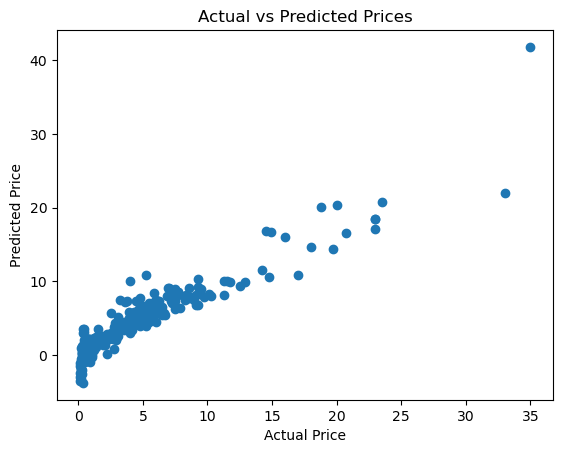

In [32]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [33]:
#prediction on testing data
testing_data_pred = le.predict(X_test)


In [34]:
#R squared error
error_score = metrics.r2_score(Y_test, testing_data_pred)

In [35]:
print('R squared error :',error_score)

R squared error : 0.836576671502687


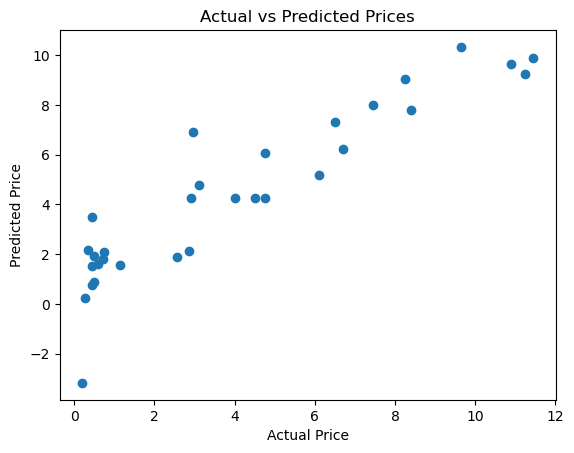

In [36]:
plt.scatter(Y_test,testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

**2. Lasso Regression**

In [37]:
#Loading the Lasso Regression Model
lasso = Lasso()

In [38]:
lasso.fit(X_train,Y_train)

Lasso()

In [39]:
#prediction on training data
training_data_pred = lasso.predict(X_train)


In [40]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_pred)

In [41]:
print('R squared error :',error_score)

R squared error : 0.8427856123435794


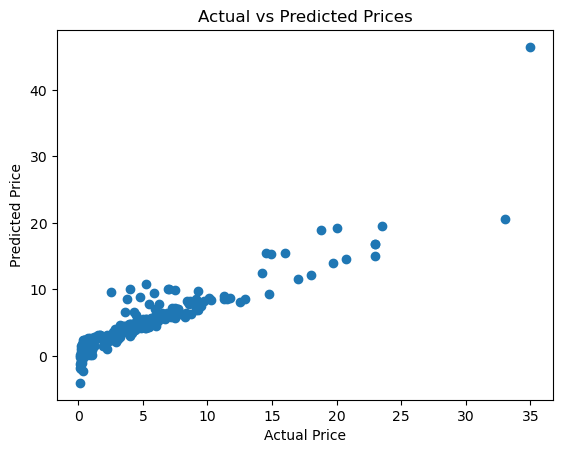

In [42]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [43]:
#prediction on testing data
testing_data_pred = lasso.predict(X_test)

In [44]:
#R squared error
error_score = metrics.r2_score(Y_test, testing_data_pred)

In [45]:
print('R squared error :',error_score)

R squared error : 0.8709167941173195


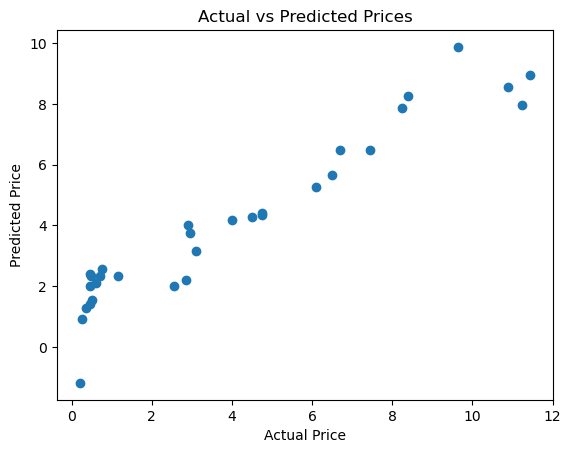

In [47]:
plt.scatter(Y_test,testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# 4. Prediction

In [52]:
#Prediction by taking input as a sample data
input_data = (2014,4.6,42450,1,0,0,0)

#Converting input data as an numpy array
input_data_asnp = np.asarray(input_data)

#Reshaping the numpy array
reshaped_data = input_data_asnp.reshape(1,-1)

#Predicting the Output
prediction = le.predict(reshaped_data)
print('Selling Price of car is : ',prediction)



Selling Price of car is :  [5.06376146]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 5. Conclusion

Our machine learning model for car price prediction demonstrated strong performance, accurately estimating used car prices based on diverse attributes. The model's accuracy and generalization capabilities make it a valuable tool for both individuals and businesses in the used car market, aiding in better decision-making and pricing strategies. 